Use 
```wget -r -np -nH --cut-dirs=4 -R "index.html*" https://labshare.cshl.edu/shares/library/repository/38599/2pData/Animals/RS02/SpatialDisc/15-Nov-2018/ -P /home/sachinks/Data/raw/mouse-cshl```
command to download the data


Once the files are downloaded to the local system, the video svd files needs to be combined to restore the original video

In [17]:
import numpy as np
import h5py
from scipy.io import loadmat
from skimage.transform import resize
import matplotlib.pyplot as plt
from tqdm import tqdm
import pdb

Video is divided into 16 pieces (4x4) hence we need to restore each of them and piece them together

In [18]:
root_dir = '/home/sachinks/Data/raw/mouse-cshl/38599/' + '2pData/Animals/RS02/SpatialDisc/15-Nov-2018/BehaviorVideo/'
cam = '2'

start_V = 0  # 29801
end_V = 1000 # 89928
used_V = end_V - start_V

Wid, Hei = 320, 240
Wid0, Hei0 = Wid//4, Hei//4

rf = 1 # resize_factor
# resized by half
Data = np.zeros((used_V, Wid//rf, Hei//rf))

for k in tqdm(range(16)):
    name = f'{root_dir}/SVD_Cam{cam}-Seg{k+1}.mat'
    # Load MATLAB .mat file
    mat_contents = loadmat(name)
    V = mat_contents['V'] # (89928, 500)
    U = mat_contents['U'] # (500, 4800)
    
    VU = V[start_V:end_V, :].dot(U) # (T, 4800)
    seg = VU.reshape((used_V, Wid0, Hei0))
    Wid1, Hei1 = Wid0//rf, Hei0//rf
    seg = resize(seg, (used_V, Wid1, Hei1), mode='constant')
    
    i, j = k//4, (k%4)
    Data[:, i * Wid1: (i+ 1) * Wid1, j*Hei1 : (j + 1) * Hei1] = seg


100%|██████████| 16/16 [00:18<00:00,  1.19s/it]


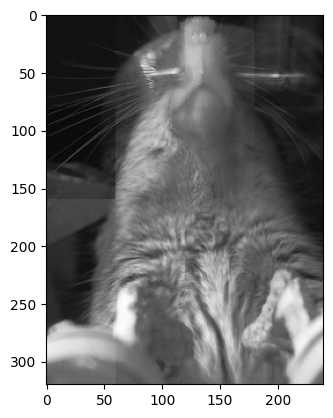

In [19]:
plt.imshow(Data[0], cmap='gray')

In [20]:
processed_dir = '/home/sachinks/Data/processed/mouse-cshl'
h5_path = f'{processed_dir}/cam{cam}.h5'
# Save to HDF5
with h5py.File(h5_path, 'w') as hf:
    hf.create_dataset('data', data=Data)

In [21]:
import cv2
import h5py
import numpy as np

video_output_path = f'{processed_dir}/output_video_{cam}.mp4'

# Open the HDF5 file and extract the data
with h5py.File(h5_path, 'r') as hf:
    data = hf['data'][:]

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
fps = 15  # Frames per second

# Get image dimensions from the data
height, width = data.shape[1], data.shape[2]

# Create a VideoWriter object
out = cv2.VideoWriter(video_output_path, fourcc, fps, (width, height))

# Convert data to uint8 and write each frame to the video
for frame in data:
    frame = (frame).astype(np.uint8)  # Convert to uint8 for display
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR
    out.write(frame)

# Release the VideoWriter and display a message
out.release()
print('Video saved successfully at', video_output_path)


Video saved successfully at /home/sachinks/Data/processed/mouse-cshl/output_video_2.mp4


Dump code below

In [14]:
data.shape

(1000, 160, 120)

In [20]:
import h5py
from PIL import Image

gif_output_path = f'{processed_dir}/gif_{cam}.gif'

# Open the HDF5 file and extract the data
with h5py.File(h5_path, 'r') as hf:
    data = hf[dataset_name][:]

# Convert data to uint8 (assuming grayscale images)
data = (data).astype('uint8')

# Prepare images for GIF creation
images_for_gif = []
for frame in data:
    img = Image.fromarray(frame)
    images_for_gif.append(img)

# Save the images as a GIF
images_for_gif[0].save(
    gif_output_path,
    save_all=True,
    append_images=images_for_gif[1:],
    loop=0,
    duration=100  # Duration is in milliseconds
)

print('GIF saved successfully at', gif_output_path)


GIF saved successfully at /home/sachinks/Data/processed/mouse-cshl/gif_2.gif


In [ ]:
import urllib.request
import os

base_url = "https://labshare.cshl.edu/shares/library/repository/38599/2pData/Animals/mSM49/SpatialDisc/30-Jul-2018/BehaviorVideo/SVD_Cam2-Seg"
local_directory = "./downloaded_files/"
os.makedirs(local_directory, exist_ok=True)

start_file_number = 1
end_file_number = 16

for file_number in range(start_file_number, end_file_number + 1):
    url = f"{base_url}{file_number}.mat"
    print(url)
    local_file_path = os.path.join(local_directory, f"SVD_Cam2-Seg{file_number}.mat")
    urllib.request.urlretrieve(url, local_file_path)
    print(f"File {file_number} downloaded successfully.")


In [ ]:
import urllib.request
url = "https://labshare.cshl.edu/shares/library/repository/38599/2pData/Animals/RS02/SpatialDisc/15-Nov-2018/data.mat"
local_file_path = "data.mat"
urllib.request.urlretrieve(url, local_file_path)
print("File downloaded successfully.")
